In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pickle

In [3]:
# Check that TF 2.1.0 is in use 
# I use colab and accelerate by TPU so tf is 2.2.0
print(tf.__version__)

2.2.0


### Points awarded for correct working models, questions, and plots.

[+10 per model correct and working -5 for failure on either]

**1.1 Answer the following questions:**
1.   Explain the indication of overfitting and how this occurs (provide plot supporting your answer)? [+4 answer, +4 plot, +2 answer and plot agree]

2.   Explain how overfit can hinder performance of a model when deployed. [+6 answer]

3.   Name two ways to avoid this. [+2 answer, +2 answer]

**1.2 Answer the following question:** 
 1.   Explain how dropout affected your loss (provide plot supporting your answer). [+5 answer, +5 plot]

**Bonus Answer the following question:**
    
  1. Considering that encoder and decoder can be constructed as separate components, trained as a single unit, and then separated for use . What uses can you brainstorm?  [+5 bonus makeup points]

**2.1 Linear AE points for constructed model, no questions here.**

**2.2 Convolutional AE points for constructed model, no questions here.**

**2.3 Report histogram plot, mean and std. dev. of normal data, and confusion matrix for 2 standard deviations as results. Discuss your loss plot.** [+10 for greater than 75 TP, +10 all else]

***Reminder: Achieve better than 75 anomalies***

In [4]:
#Import dataset and normalize to [0,1]
mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = mnist.load_data()
#Normalize
data_train = data_train / 255
data_test = data_test /255
#Reshape
data_train = data_train.reshape(data_train.shape[0], 28, 28, 1)
data_test = data_test.reshape(data_test.shape[0], 28, 28, 1)

#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(labels_train, num_classes=10)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes=10)

11493376/11490434 [==============================] - 0s 0us/step


# Section 1 - CNN's

Fill in the model:
* Input: 28x28x1 grayscale image (1 specifies single channel grayscale).
* 1st hidden: 2D convolutional layer with 256 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 128 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: Flatten layer to map 2D to 1D vector.
* 6th hidden: Dense layer of 100 perceptrons.
* 7th hidden: Dense layer of 100 perceptrons.
* Output: 10 perceptrons for classification.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br>  Train for 200 epochs**

## 1.1 Overfitting 

In [5]:
#Create and train model architecture
def CNN_overfit():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = tf.keras.models.Sequential()

    #### Fill in Model ####
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(128 , (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    
    return model

CNN_overfit = CNN_overfit()
print(CNN_overfit.summary())
CNN_overfit.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               320100    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1

In [6]:
# Information contained in history dict.
print(history_overfit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


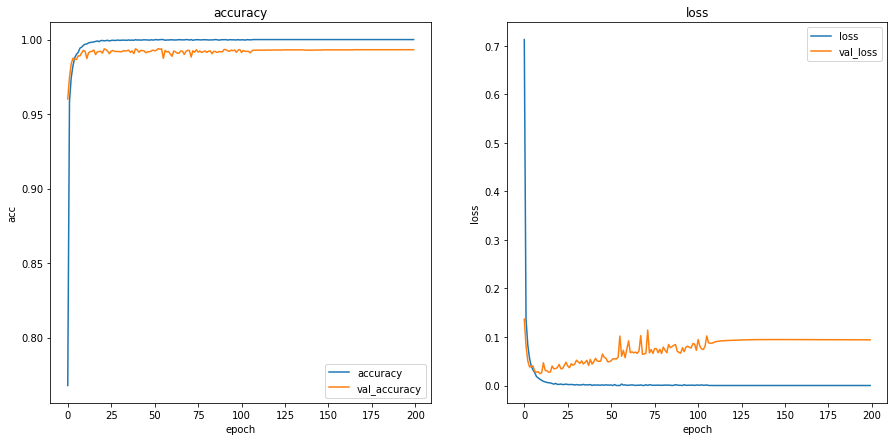

In [12]:
#acc scores = 99.32%
#Plot accuracy vs epoch
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(history_overfit.history['accuracy'], label='accuracy')
plt.plot(history_overfit.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_overfit.history['loss'],label='loss')
plt.plot(history_overfit.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
#### Fill in plot ####

## 1.2 Improvements 

Using the network above, (1) insert a dropout of 30% between the input and first hidden layer. Run the model again and make note of the result. Next, (2 ) remove the dropout between input and hidden and add a dropout to each hidden layer except between softmax and output layer. Plot accuracy and loss only for (2). What do you observe for (2)?.

For 1.2 (1):

In [13]:
def CNN_dropout_hidden():
    model = tf.keras.models.Sequential()
    #### Fill in model ####
    model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Conv2D(128 , (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

#Compile and train the model
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Epoch 1/200
60/60 [==============================] - 3s 51ms/step - loss: 0.6633 - accuracy: 0.7892 - val_loss: 0.2062 - val_accuracy: 0.9378
Epoch 2/200
60/60 [==============================] - 3s 49ms/step - loss: 0.1692 - accuracy: 0.9472 - val_loss: 0.1322 - val_accuracy: 0.9658
Epoch 3/200
60/60 [==============================] - 3s 49ms/step - loss: 0.1023 - accuracy: 0.9674 - val_loss: 0.0992 - val_accuracy: 0.9796
Epoch 4/200
60/60 [==============================] - 3s 49ms/step - loss: 0.0756 - accuracy: 0.9753 - val_loss: 0.0778 - val_accuracy: 0.9819
Epoch 5/200
60/60 [==============================] - 3s 49ms/step - loss: 0.0607 - accuracy: 0.9808 - val_loss: 0.0803 - val_accuracy: 0.9839
Epoch 6/200
60/60 [==============================] - 3s 49ms/step - loss: 0.0515 - accuracy: 0.9837 - val_loss: 0.0560 - val_accuracy: 0.9869
Epoch 7/200
60/60 [==============================] - 3s 49ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0561 - val_accuracy: 0.9891
Epoch 

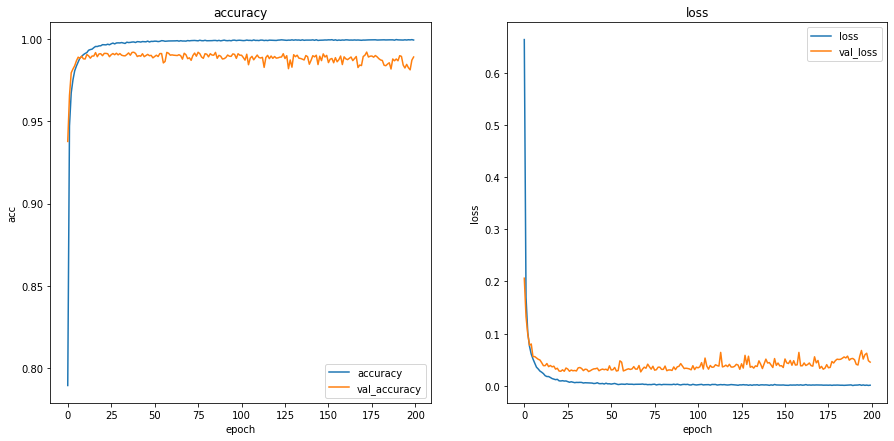

In [15]:
# acc scores = 98.92%
# Plot accuracy vs epoch
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(history_dropout_hidden.history['accuracy'], label='accuracy')
plt.plot(history_dropout_hidden.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_dropout_hidden.history['loss'],label='loss')
plt.plot(history_dropout_hidden.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
#### Fill in plot ####
plt.show()

For 1.2 (2):

In [16]:
#Create and train model architecture
def CNN_dropout_hidden2():
    model = tf.keras.models.Sequential()
    #### Fill in model ####
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(3, 3),activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(128 , (3, 3), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

#Compile and train the model
CNN_dropout_hidden2 = CNN_dropout_hidden2()
CNN_dropout_hidden2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_dropout_hidden2 = CNN_dropout_hidden2.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_hidden2 = CNN_dropout_hidden2.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden2[1]*100))

Epoch 1/200
60/60 [==============================] - 5s 79ms/step - loss: 0.7112 - accuracy: 0.7669 - val_loss: 0.2665 - val_accuracy: 0.9395
Epoch 2/200
60/60 [==============================] - 5s 77ms/step - loss: 0.1916 - accuracy: 0.9452 - val_loss: 0.0905 - val_accuracy: 0.9792
Epoch 3/200
60/60 [==============================] - 5s 78ms/step - loss: 0.1277 - accuracy: 0.9641 - val_loss: 0.0751 - val_accuracy: 0.9827
Epoch 4/200
60/60 [==============================] - 5s 77ms/step - loss: 0.0988 - accuracy: 0.9722 - val_loss: 0.0506 - val_accuracy: 0.9863
Epoch 5/200
60/60 [==============================] - 5s 77ms/step - loss: 0.0847 - accuracy: 0.9755 - val_loss: 0.0528 - val_accuracy: 0.9867
Epoch 6/200
60/60 [==============================] - 5s 77ms/step - loss: 0.0733 - accuracy: 0.9792 - val_loss: 0.0394 - val_accuracy: 0.9903
Epoch 7/200
60/60 [==============================] - 5s 77ms/step - loss: 0.0689 - accuracy: 0.9801 - val_loss: 0.0365 - val_accuracy: 0.9898
Epoch 

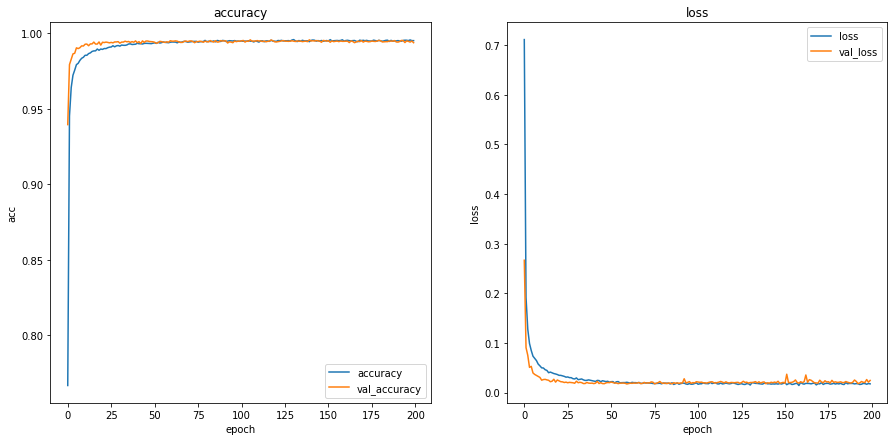

In [17]:
# acc scores = 99.37%
# Plot accuracy vs epoch
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(history_dropout_hidden2.history['accuracy'], label='accuracy')
plt.plot(history_dropout_hidden2.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='lower right')
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_dropout_hidden2.history['loss'],label='loss')
plt.plot(history_dropout_hidden2.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
#### Fill in plot ####
plt.show()

Summary for 1.2 Dropout improvements

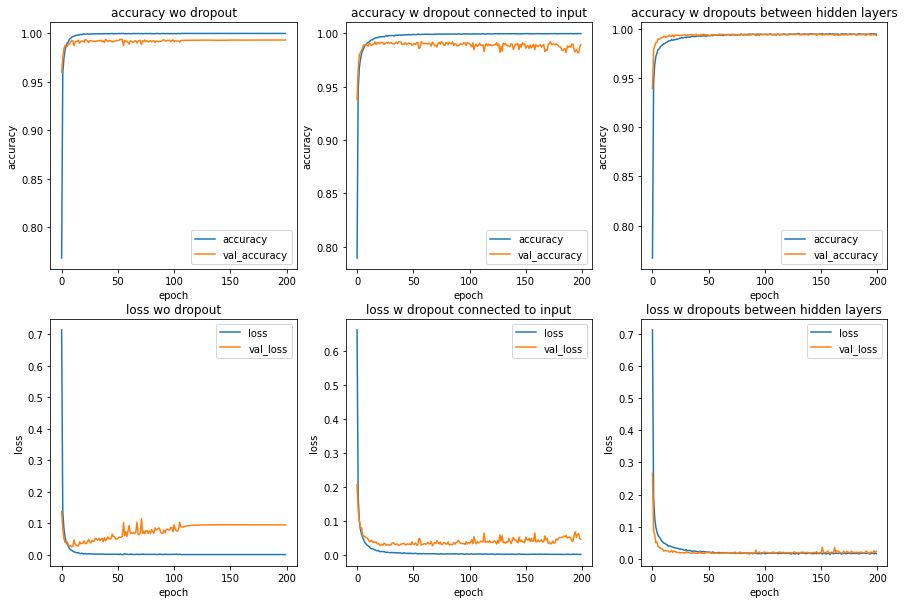

In [18]:
plt.figure(figsize=(15,10))

# Plot accuracy vs epoch
plt.subplot(231)
plt.plot(history_overfit.history['accuracy'], label='accuracy')
plt.plot(history_overfit.history['val_accuracy'], label='val_accuracy')
plt.legend(loc='lower right')
plt.title('accuracy wo dropout')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.subplot(232)
plt.plot(history_dropout_hidden.history['accuracy'],label='accuracy')
plt.plot(history_dropout_hidden.history['val_accuracy'],label='val_accuracy')
plt.legend(loc='lower right')
plt.title('accuracy w dropout connected to input')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.subplot(233)
plt.plot(history_dropout_hidden2.history['accuracy'],label='accuracy')
plt.plot(history_dropout_hidden2.history['val_accuracy'],label='val_accuracy')
plt.legend(loc='lower right')
plt.title('accuracy w dropouts between hidden layers')
plt.xlabel('epoch')
plt.ylabel('accuracy')
#### Fill in plot ####

#Plot loss vs epoch
plt.subplot(234)
plt.plot(history_overfit.history['loss'], label='loss')
plt.plot(history_overfit.history['val_loss'], label='val_loss')
plt.legend(loc='upper right')
plt.title('loss wo dropout')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(235)
plt.plot(history_dropout_hidden.history['loss'],label='loss')
plt.plot(history_dropout_hidden.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss w dropout connected to input')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(236)
plt.plot(history_dropout_hidden2.history['loss'],label='loss')
plt.plot(history_dropout_hidden2.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss w dropouts between hidden layers')
plt.xlabel('epoch')
plt.ylabel('loss')
#### Fill in plot ####
plt.show()

# Section 2- Autoencoders

## 2.1 Linear AE 

Fill in the model:
* Input: Flattened grayscale image to 28^2 = 784-dimensional vector.
* 1st hidden: 400 perceptrons.
* 2nd hidden: 200 perceptrons.
* 3rd hidden: 100 perceptrons.
* 4th hidden: 200 perceptrons.
* 5th hidden: 400 perceptrons.
* Output: 784 perceptrons.
<br>**Train for 150 epochs**

In [0]:
#Reshape training and testing data
data_train_reshape_fcae = data_train.reshape(data_train.shape[0], 784)
data_test_reshape_fcae = data_test.reshape(data_test.shape[0], 784)

In [38]:

# Create autoencoder architecture
def deep_ae():
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Input(shape=(784,)))
    # Encoder
    
    #### Fill in the model ####
    model.add(tf.keras.layers.Dense(400, activation='relu'))
    #model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(200, activation='relu'))
    #model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    # Decoder
    
    #### Fill in the model ####
    model.add(tf.keras.layers.Dense(200, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(400, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(784, activation='sigmoid'))
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
deep_ae = deep_ae()
print(deep_ae.summary())
deep_ae.compile(loss='categorical_crossentropy', optimizer='adam')
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=150, batch_size=250, shuffle=True)
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_36 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_37 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_25 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 200)               20200     
_________________________________________________________________
dropout_26 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 400)              

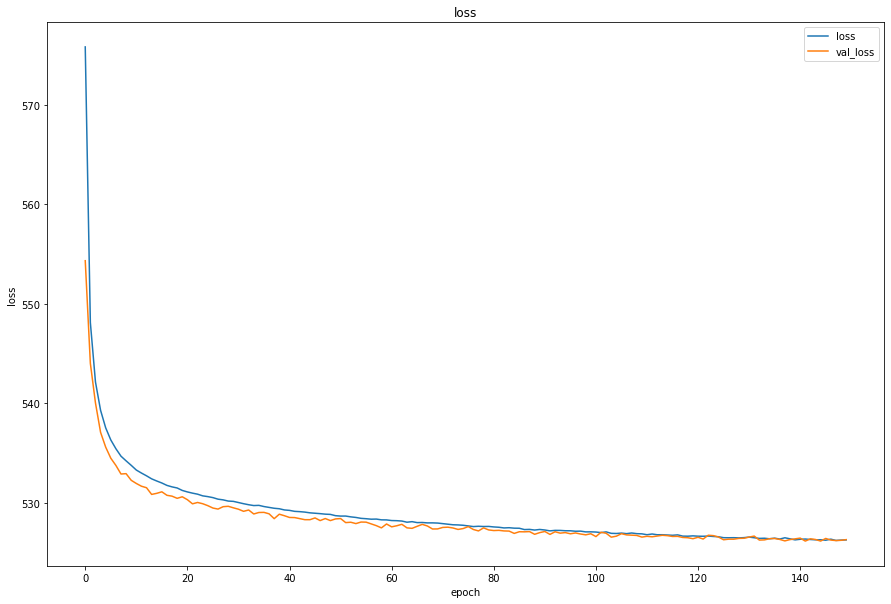

In [39]:
#Plot train/validation loss vs epoch
plt.figure(figsize=(15,10))
#Plot loss vs epoch
plt.plot(history_deep_ae.history['loss'],label='loss')
plt.plot(history_deep_ae.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
#### Fill in the plot ####
plt.show()

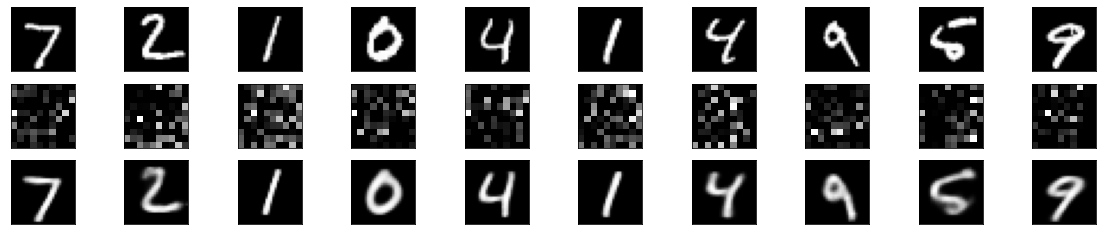

In [42]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.2 Convolutional AE 

Fill in the model:
* Input: 28x28x1 grayscale image.
* 1st hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 6th hidden: A 2x2 upsample layer.
* 7th hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 8th hidden: A 2x2 upsample layer.
* Output: A convolutional layer with a single feature map and 3x3 filters.
<br>**All experiments with dropout set at 30%. Train for 200 epochs**

In [0]:
#Reshape data to account for grayscale channel in each image
data_train_reshape_cae = data_train.reshape(data_train.shape[0], 28, 28, 1)
data_test_reshape_cae = data_test.reshape(data_test.shape[0], 28, 28, 1)

In [44]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = tf.keras.models.Sequential()
    
    #Encoder
    model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3),activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(tf.keras.layers.Conv2D(8 , (3, 3), activation='relu',padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
    #### Fill in model ####
    
    #Decoder
    model.add(tf.keras.layers.Conv2D(8 , (3, 3), activation='relu',padding='same'))
    model.add(tf.keras.layers.UpSampling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(16 , (3, 3), activation='relu',padding='same'))
    model.add(tf.keras.layers.UpSampling2D((2, 2)))
    #### Fill in model ####
    model.add(tf.keras.layers.Conv2D(1 , (3, 3), activation='relu',padding='same'))
    
    return model

conv_ae = cae()
print(conv_ae.summary())

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
conv_ae.compile(loss='mse', optimizer='adam')
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=150, batch_size=250, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)       

[]

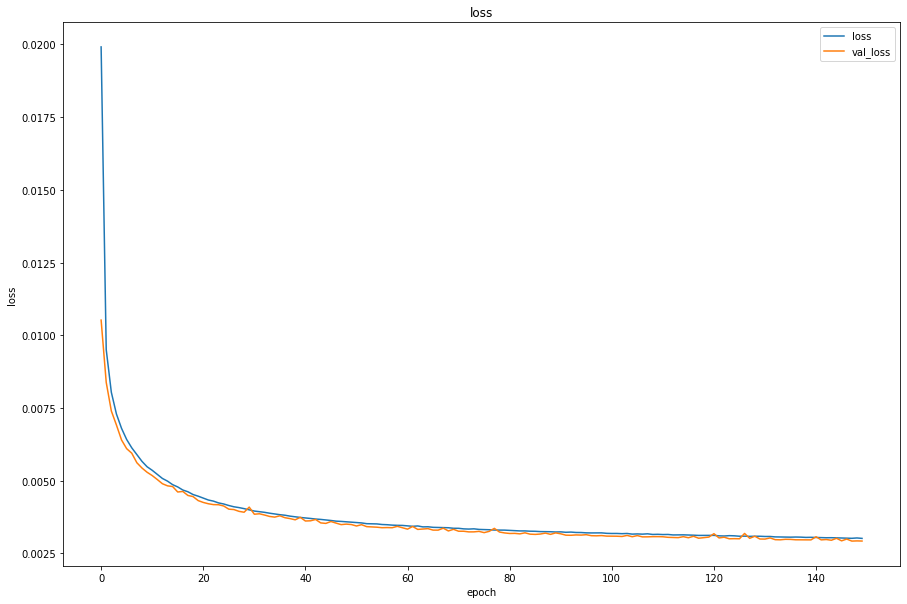

In [46]:
#Plot train/validation loss vs epoch
#Plot loss vs epoch
plt.figure(figsize=(15,10))
plt.plot(history_conv_ae.history['loss'],label='loss')
plt.plot(history_conv_ae.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot()
#### Fill in the plot #### 

<Figure size 432x288 with 0 Axes>

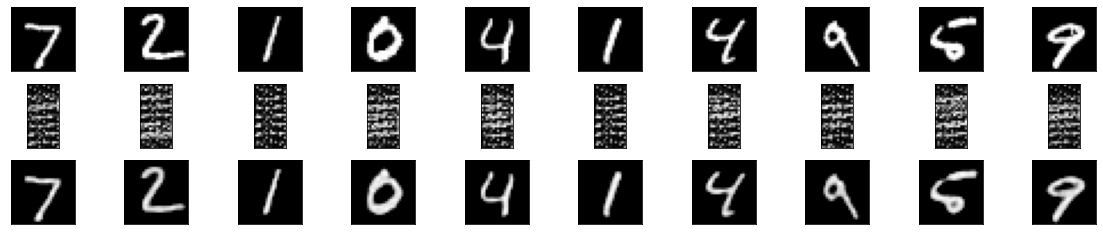

In [47]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.3 Machine Anomaly Detection

At this point you have enough starter code to 
Using the dataset provided **create the autoencdoer model** you deem necessary to achieve better than 75 true positives (TP = 75) where a true instance is an anomaly.
Or detect all 143 if you can! Although anomaly 
detection thresholds can be set arbitrarily and various metrics
are used depending on the problem, we will set ours at 2 
standard deviations from the mean of "normal" data to judge TP's. Use the code provided at the bottom for calculating true positives and histogramming. 

In [0]:
#### Restart your kernal and run from here to clear some memory
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx('float64')

import sys
from os import listdir
from os.path import isfile, join

In [50]:
### I am using colab and the data is saved in my google drive so I need:
print('attention! using colab here and data is in my google drive!')
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
datapath = './drive/My Drive/UCSD/2020/ECE228/PY2/'

#### Example spectrograms

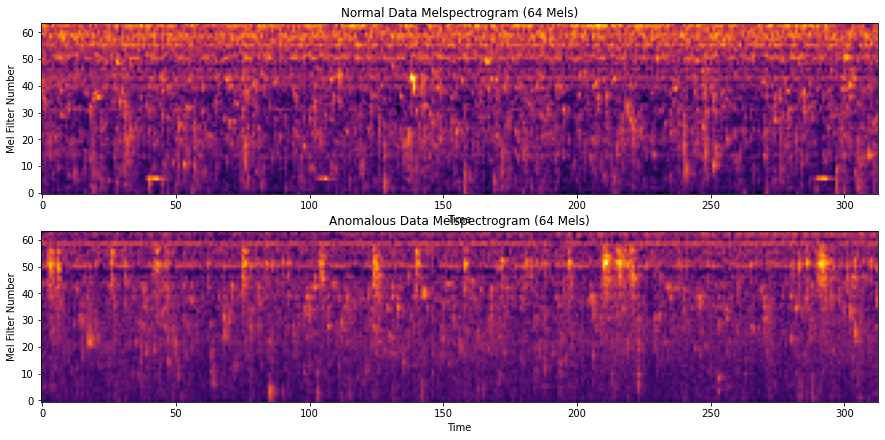

In [52]:
#### Load melspectrograms
ex_norm  = np.load(datapath + 'ex_normalspec.npy')
ex_anom = np.load(datapath + 'ex_abnormspec.npy')

plt.figure(figsize=(15,7))
plt.subplot(211)
plt.imshow(ex_norm[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Normal Data Melspectrogram (64 Mels)') 

plt.subplot(212)
plt.imshow(ex_anom[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Anomalous Data Melspectrogram (64 Mels)') 
plt.show()

#### General template, up to this point, for constructing your deep learning model 
1. Set up the data (reshape, scale, etc...
2. Initialize a loss function
3. Compile a model
4. Train a model

In [53]:
# Create your own Baseline autoencoder
# Model name is fixed for use by later code
autoencoderBASE = tf.keras.models.Sequential([
  #### Fill in your model #####
  keras.layers.Input(shape=(128,1252, 1)),
    
  keras.layers.Conv2D(32, kernel_size=(3, 3),activation='relu', padding='same'),
  keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
  keras.layers.Conv2D(16 , (3, 3), activation='relu',padding='same'),
  keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'),
    
  keras.layers.Conv2D(16 , (3, 3), activation='relu',padding='same'),
  keras.layers.UpSampling2D((2, 2)),
  keras.layers.Conv2D(32 , (3, 3), activation='relu',padding='same'),
  keras.layers.UpSampling2D((2, 2)),
    
  keras.layers.Conv2D(1 , (3, 3), activation='relu',padding='same'),
    
])
print(autoencoderBASE .summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 128, 1252, 32)     320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 626, 32)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 626, 16)       4624      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 313, 16)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 313, 16)       2320      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 64, 626, 16)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 626, 32)     

In [0]:
# Load data
x_train = np.load(datapath +  'training_data.npy')
test = np.load(datapath + 'test_data.npy')

In [0]:
# reshape
normaldata_reshape = x_train.reshape(x_train.shape[0],2*64,4*313,1)
test_reshape = test.reshape(test.shape[0],2*64,4*313,1)

x_train_reshape = normaldata_reshape[:800,:,:,:]
x_val_reshape = normaldata_reshape[800:,:,:,:]

In [58]:
# Training
autoencoderBASE.compile(loss='MSE', optimizer='adam')
history_conv_BASE = autoencoderBASE.fit(x_train_reshape, x_train_reshape, validation_data=(x_val_reshape, x_val_reshape), epochs=150, batch_size=50, shuffle=True)
decoded_data = autoencoderBASE.predict(test_reshape)

Epoch 1/150
16/16 [==============================] - 7s 409ms/step - loss: 34.6413 - val_loss: 25.1657
Epoch 2/150
16/16 [==============================] - 6s 403ms/step - loss: 21.0570 - val_loss: 16.4503
Epoch 3/150
16/16 [==============================] - 6s 404ms/step - loss: 16.2975 - val_loss: 14.3638
Epoch 4/150
16/16 [==============================] - 6s 404ms/step - loss: 14.1562 - val_loss: 13.1891
Epoch 5/150
16/16 [==============================] - 6s 405ms/step - loss: 13.0008 - val_loss: 12.4771
Epoch 6/150
16/16 [==============================] - 6s 406ms/step - loss: 12.3137 - val_loss: 12.0709
Epoch 7/150
16/16 [==============================] - 7s 406ms/step - loss: 11.9071 - val_loss: 11.8849
Epoch 8/150
16/16 [==============================] - 6s 405ms/step - loss: 11.6283 - val_loss: 11.6636
Epoch 9/150
16/16 [==============================] - 6s 405ms/step - loss: 11.4067 - val_loss: 11.4735
Epoch 10/150
16/16 [==============================] - 6s 404ms/step - los

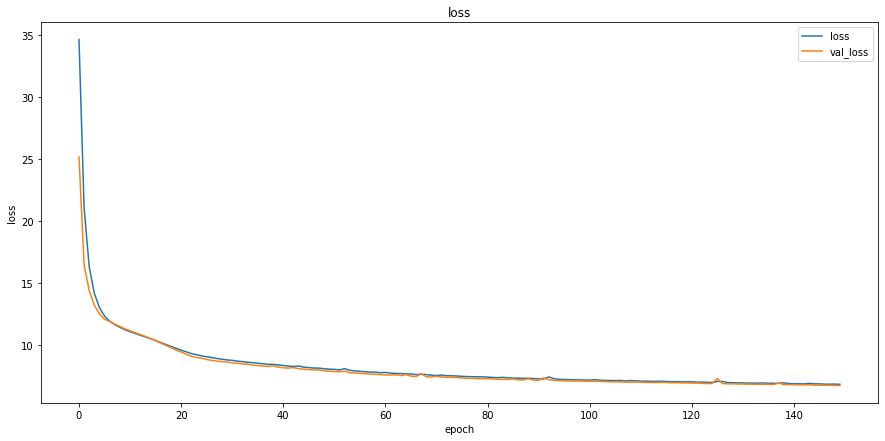

In [61]:
# Plot loss versus epoch.
plt.figure(figsize=(15,7))
plt.plot(history_conv_BASE.history['loss'],label='loss')
plt.plot(history_conv_BASE.history['val_loss'],label='val_loss')
plt.legend(loc='upper right')
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [0]:
######### This code should remain untouched as much as possible,
#### except where your variable names for loss function or data set are needed.
#### This code feeds your data through the trained network to get mean and std
#### If you did not use a validation set then only use
#### your training data. Concatenating is therefore un-needed.
#### lossFunction <- Your loss function's name or use this one. Your choice of loss function.
##############################################################################################

lossFunction = tf.keras.losses.MeanSquaredError()

norm_list = []
dataset = (tf.data.Dataset.from_tensor_slices(normaldata_reshape)).batch(1)
for i, instance in dataset.enumerate():
    ae_predictions = autoencoderBASE(instance).numpy()
    norm_list.append(lossFunction(instance, ae_predictions).numpy())
# Feed the anomaly data through to get its error
anom_list = []
anomset = (tf.data.Dataset.from_tensor_slices(test_reshape)).batch(1)
for i, instance in anomset.enumerate():
    ae_predictions = autoencoderBASE(instance).numpy()
    anom_list.append(lossFunction(instance, ae_predictions).numpy())
    
normal_data_ERRORs = np.array(norm_list)
abnormal_data_ERRORs = np.array(anom_list)

The mean of normal data is 6.7809        and standard deviation is 0.6114


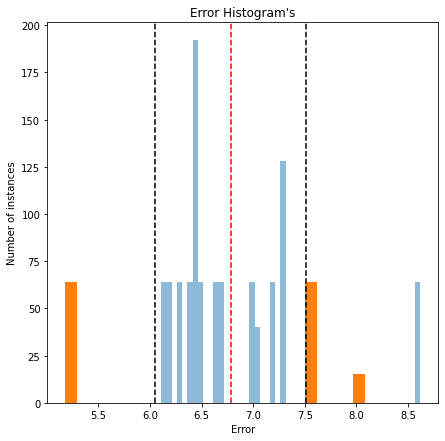

In [71]:

######################### Code for presenting true positives to Question 2.3 ################## 
threshold = 1.2
mean = normal_data_ERRORs.mean()
std = normal_data_ERRORs.std()
print(f'The mean of normal data is {mean:.4f}\
        and standard deviation is {std:.4f}')
upperbound = mean+threshold*std
lowerbound = mean-threshold*std
plt.figure(figsize=(7,7))
plt.title('Error Histogram\'s')
plt.hist(normal_data_ERRORs, bins=50, alpha=0.5)
plt.hist(abnormal_data_ERRORs, bins=25, alpha=1.0)
plt.axvline(mean,ls='--', c='r')
plt.axvline(lowerbound, ls='--',c='k')
plt.axvline(upperbound, ls='--',c='k')
plt.xlabel('Error')
plt.ylabel('Number of instances')
plt.show()

In [72]:
anomaly_data = test
tp_count = np.sum(abnormal_data_ERRORs >= upperbound) +\
           np.sum(abnormal_data_ERRORs <= lowerbound)      
fn_count = anomaly_data.shape[0] - tp_count
fp_count = np.sum(normal_data_ERRORs >= upperbound)+\
           np.sum(normal_data_ERRORs <= lowerbound)        
tn_count = 1000 - fp_count

print(f'TP {tp_count} \t FP {fp_count}')
print(f'FN {fn_count} \t TN {tn_count}')

TP 143 	 FP 64
FN 0 	 TN 936
